In [2]:
import pandas as pd

path = "../data/"
df = pd.read_csv(path+"Advertising.csv", index_col=0)
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


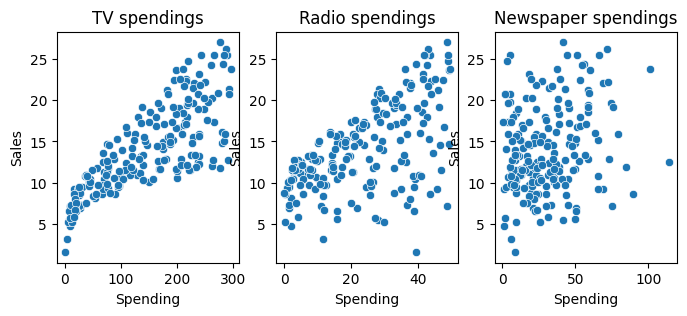

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(8,3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y="Sales", ax=ax[i])
    ax[i].set(xlabel="Spending", title=f"{feature} spendings")

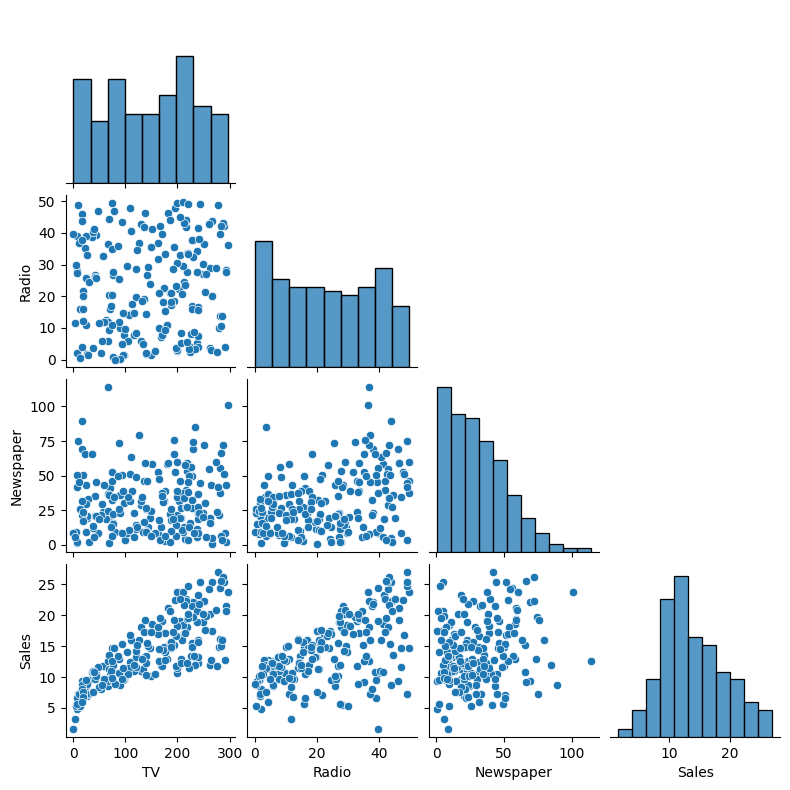

In [4]:
ax = sns.pairplot(df, corner=True, height=2)

Intercept B0: 7.0326
Intercept B1: 0.0475


[Text(0.5, 1.0, 'Tv advertisement linear regression'),
 Text(0.5, 0, 'Thousand dollars'),
 Text(0, 0.5, 'Sales thousands units')]

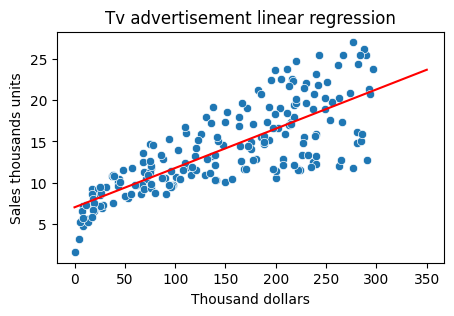

In [5]:
import numpy as np

# Tekniskt sätt borde även X vara litet för även detta är ett stickprov precis som y
X, y = df["TV"], df["Sales"]
beta_1, beta_0 = np.polyfit(X, y, deg=1)

# Lambad i python gäller bara i en fil, du kan inte spara eller skicka runt dom
y_hat = lambda x: beta_0 + beta_1*x

print(f"Intercept B0: {beta_0:.4f}")
print(f"Intercept B1: {beta_1:.4f}")

spend = np.linspace(0, 350)
fig, ax = plt.figure(figsize=(5,3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(title="Tv advertisement linear regression", xlabel="Thousand dollars", ylabel="Sales thousands units")

<Axes: xlabel='TV', ylabel='Sales'>

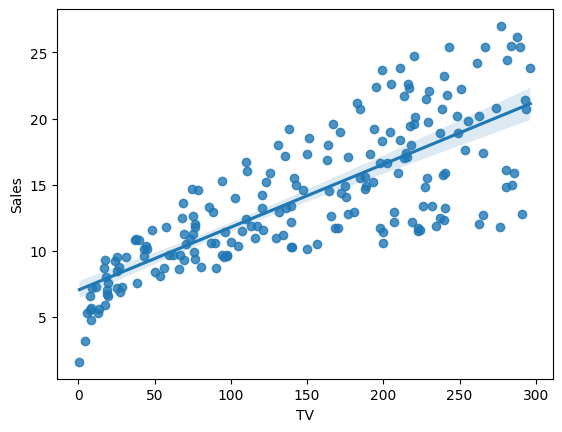

In [6]:
sns.regplot(x=X, y=y)
# Den ljusblå fältet är konfieransinervallen 
# och så vi kan se är den aldeles för hög
# så vi kan inte förutse någonting 

In [7]:
from sklearn.linear_model import LinearRegression
# Multiple linjär regression
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)
b = np.linalg.pinv(X.T @ X) @ X.T @ y
print(b)

model = LinearRegression()
beta = model.fit(X, y)

print( beta.coef_ )

# R2, igentligen bara den enda statetstiken vi får
beta.score(X, y)


0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64
[ 0.          0.04576465  0.18853002 -0.00103749]


0.8972106381789521

In [8]:
test_sample = [1, 230.1, 37.8, 69.2]
y_hat = model.predict([test_sample])
print(f"TV: $230, Radio: $37.8, Newspaper: $69.2k predicts {y_hat[0]:.1f} thousand units")

TV: $230, Radio: $37.8, Newspaper: $69.2k predicts 20.5 thousand units


c:\Code\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
# Dela Upp Datan

# Valedering Data är det vi använder under träninging för att testa data
# Test Data är den data vi använder i det slutgiltiga testet

train_fraction = int(len(df)*0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False)
val = df.drop(train.index)

X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_val, y_val = val.drop("Sales", axis="columns"), val["Sales"]

X_train.insert(0, "Intercept", 1)
X_val.insert(0, "Intercept", 1)
for dataset in ["X_train", "X_val", "y_train", "y_val"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")

Shape of X_train: (140, 4)
Shape of X_val: (60, 4)
Shape of y_train: (140,)
Shape of y_val: (60,)


In [10]:
model = LinearRegression()
# Tränar modellen
model.fit(X_train, y_train)

LinearRegression()

$$MAE = \frac{1}{m} \sum|y_i - \hat{y}_i|^2$$

In [17]:
n = len(y_val)
y_hat = model.predict(X_val)
# Vi använder np.divide för den är snabbare än python '/'
MAE  = np.divide(1, n) * np.sum(np.abs(y_val - y_hat)) 
MSE  = np.divide(1, n) * np.sum(np.square(y_val - y_hat)) 
RMSE = np.sqrt(MSE)
RSE  = np.sqrt( np.divide(1, n-X_val.shape[1]-2) * np.sum(np.square(y_val - y_hat)) ) 

MAE, MSE, RMSE, RSE

(1.3244490959726527,
 3.5404256182385185,
 1.8816018755939097,
 1.9833825255071809)

In [12]:
# Vi gör om vår indata till polynom
import numpy as np
import matplotlib.pyplot as plt 

def ground_truth(x):
    return np.square(x) + .5*x +3 

def draw_data(X, y):
    fig, ax = plt.figure(dpi=100), plt.axes()
    ax.plot(X, y, '.', label="Data")
    
    x = np.linespace(-3, 3, samples)

    ax.plot(x, ground_truth(x), label="Ground truth")

    ax.set(title=r"$y=x^2 + 0.5x + 3 + \epsilon$")
    ax.legend(edgecolor="r")
    return ax

x = np.random.uniform(-3, 3, (samples, 1))
y = ground_truth(X)+np.random.rand(samples, 1)
draw_data(X, y)

NameError: name 'samples' is not defined

In [ ]:
beta_hat = np.polyfit(X.reshape(-1, ), y, deg=2)
ax = draw_data(X, y)
x = np.linspace(-3, 3, samples)

ax.plot(x, beta_hat[0]*np.square(x)+beta_hat[1]*x + beta_hat[2], label="Model")
ax.legend()
beta_hat

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
poly_features[:4], X[:4], np.square(X[:4])

(array([[1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
         1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
         5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
         2.615760e+03, 4.788640e+03],
        [1.000000e+00, 4.450000e+01, 3.930000e+01, 4.510000e+01,
         1.000000e+00, 4.450000e+01, 3.930000e+01, 4.510000e+01,
         1.980250e+03, 1.748850e+03, 2.006950e+03, 1.544490e+03,
         1.772430e+03, 2.034010e+03],
        [1.000000e+00, 1.720000e+01, 4.590000e+01, 6.930000e+01,
         1.000000e+00, 1.720000e+01, 4.590000e+01, 6.930000e+01,
         2.958400e+02, 7.894800e+02, 1.191960e+03, 2.106810e+03,
         3.180870e+03, 4.802490e+03],
        [1.000000e+00, 1.515000e+02, 4.130000e+01, 5.850000e+01,
         1.000000e+00, 1.515000e+02, 4.130000e+01, 5.850000e+01,
         2.295225e+04, 6.256950e+03, 8.862750e+03, 1.705690e+03,
         2.416050e+03, 3.422250e+03]]),
    Intercept     TV  Radio  Newspaper
 1          1  230.1   37.8

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(poly_features, y)

model.coef_, model.intercept_

(array([ 0.00000000e+00,  2.58262743e-02,  1.05371485e-02,  3.44186766e-03,
         5.72458747e-17,  2.58262743e-02,  1.05371485e-02,  3.44186766e-03,
        -1.09702663e-04,  1.10525949e-03, -4.55155391e-05,  1.11997015e-04,
         8.26605896e-05,  1.19125650e-05]),
 5.08478166716719)

In [ ]:
#...
ax.plot(x, pred, label = "Model")
ax.legend()

In [ ]:
# Vad händer om vi kör utan polynom, bara en vanlig regression
model = LinearRegression()
model.fit(X, y)
ax = draw_data(X,y)
ax.plot(X, model.predict(x.reshape(-1,1))
ax.set(title='Underfitting')
#... 

In [ ]:
# Overfit
poly_model_30 = PolynomialFeatures(30, include=False)
X_features = poly_model_30.fit_transform(X)
print(X_features.shape)

model = LinearRegression()
model.fit(X_features, y)
x = np.linspace(-3,3, samples)
#...


In [ ]:
np.random.seed(42)

samples = 1000
X = np.random.uniform(-3, 3, (samples, 1))

# Igentligten ska vi använda numpys ^ för den har bättre avrundningar än python
f = lambda x: x**4 + x**2 +0.5 + x +3

y = f(x) + np.random.randn(samples, 1)

NameError: name 'x' is not defined

In [ ]:
from sklearn.model_selection import train_test_split 

# sklearn avänder train när dom menar validering 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape


((134, 4), (33, 4), (33, 4), (134,), (33,), (33,))

In [ ]:
from sklean.metrics import root_mean_squared_error

RMSE_val = []

for degree in range(1, 100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train)

In [ ]:
plt.plot(range(1,100), RMSE_val)

In [ ]:
plt.plot(range(1,10), RMSE_val[:9], 'o--')